/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  # This is added back by InteractiveShellApp.init_path()


Lees Edwards [ 1.18986484  0.47627369  0.23247185  0.10588466  0.03440804 -0.01008082
 -0.04420481 -0.06535466]
Green Kubo [1.16120005 0.57585091 0.39970458 0.31679977 0.26724944 0.2312635
 0.20802791 0.19051592]
Delta: 0.02468548353695608
Delta: 0.07249334694877899
Delta: 0.016640207486237256
Lees Edwards [1.18810763 0.55874928 0.32126937 0.19266841 0.11226064 0.06187565
 0.02573313 0.00228711]
Green Kubo [1.15386389 0.66779278 0.48972535 0.39232344 0.32507218 0.28047594
 0.24517448 0.21547004]
Delta: 0.029677450824467162
Delta: 0.050498843844907215
Delta: 0.004388070831436494
Lees Edwards [1.18182259 0.6258881  0.38911341 0.25328312 0.16674361 0.1027293
 0.05970631 0.02240599]
Green Kubo [1.17216678 0.72726794 0.55624354 0.45606044 0.39191742 0.33788962
 0.30428964 0.26960444]
Delta: 0.008237575701919575
Delta: 0.0520543324988467
Delta: -0.014334067755316263
Lees Edwards [1.17347058 0.67322072 0.44899862 0.31738019 0.22478704 0.15832326
 0.1055082  0.06568237]
Green Kubo [1.14114354 

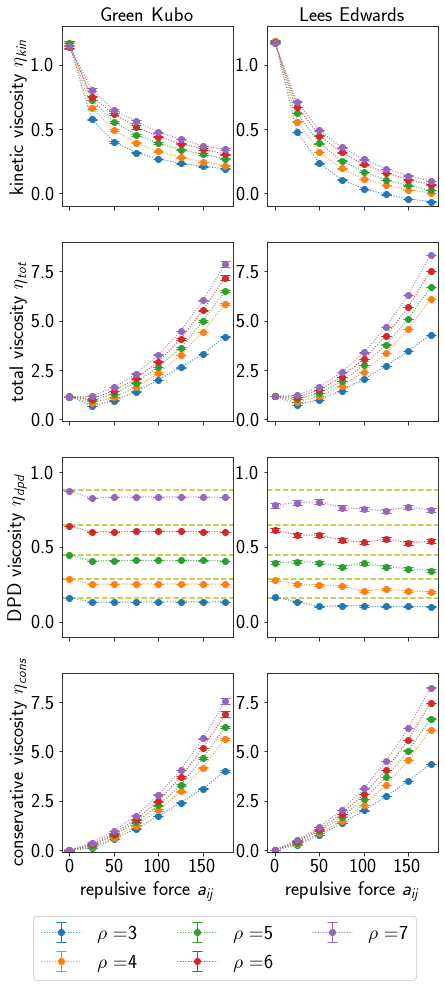

In [1]:
#import standard libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['xtick.labelsize']=20
matplotlib.rcParams['ytick.labelsize']=20
matplotlib.rcParams['font.size']=25
matplotlib.rcParams['legend.fontsize']=20
matplotlib.rcParams['axes.labelsize']=20
matplotlib.rcParams['text.latex.preamble']=[r'\usepackage{bm}', r'\usepackage{textgreek}', r'\usepackage{sfmath}', r'\usepackage{siunitx}', r'\sisetup{per-mode=reciprocal}    ', r'\DeclareSIUnit\Molar{M}']
matplotlib.rc('text',usetex=True)

data_le =  np.genfromtxt('visc_le.txt', delimiter=';')

data =  np.genfromtxt('visc_gk.txt', delimiter=';')

data_gk = np.empty([40,8])

selection = [0, 40, 80]
selection = np.array(selection)

for i in range(40):
    data_gk[i,:] = [data[i,0], 
                     data[i,1], 
                     np.mean(data[selection,2]), 
                     np.std(data[selection,2]),
                     np.mean(data[selection,3]), 
                     np.std(data[selection,3]),
                     np.mean(data[selection,4]), 
                     np.std(data[selection,4])]
    selection += 1
    
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(2*3.375,4.5*3.375))

size = 20

selection = [0, 5, 10, 15, 20, 25, 30, 35]
rho = [3, 4, 5, 6, 7]
selection = np.array(selection)

for i in range(5):
    axes[0,0].errorbar(data_gk[selection,1], data_gk[selection,2], yerr=data_gk[selection,3], 
                 marker='o', 
                 linestyle='dotted', 
                 linewidth=1.0, 
                 label = r"$\rho =$" + str(rho[i]),
                 capsize=5)
    
    axes[1,0].errorbar(data_gk[selection,1], data_gk[selection,4], yerr=data_gk[selection,5], 
                 marker='o', 
                 linestyle='dotted', 
                 linewidth=1.0, 
                 label = r"$\rho =$" + str(rho[i]),
                 capsize=5)
    
    axes[2,0].errorbar(data_gk[selection,1], data_gk[selection,6], yerr=data_gk[selection,7], 
                 marker='o', 
                 linestyle='dotted', 
                 linewidth=1.0, 
                 label = r"$\rho =$" + str(rho[i]),
                 capsize=5)
    axes[2,0].axhline(2*np.pi*4.5*rho[i]**2/1575, color='tab:olive', linestyle='dashed')
    
    axes[3,0].errorbar(data_gk[selection,1], data_gk[selection,4]-data_gk[selection,2],
                 yerr = data_gk[selection,5] + data_gk[selection,3],
                 marker='o', 
                 linestyle='dotted', 
                 linewidth=1.0, 
                 label = r"$\rho =$" + str(rho[i]),
                 capsize=5)
    
    
    #########################################################################################
    
    
    axes[0,1].errorbar(data_le[selection,1], data_le[selection,2], yerr=data_le[selection,3], 
                 marker='o', 
                 linestyle='dotted', 
                 linewidth=1.0, 
                 label = r"$\rho =$" + str(rho[i]),
                 capsize=5)
    
    axes[1,1].errorbar(data_le[selection,1], data_le[selection,4], yerr=data_le[selection,5], 
                 marker='o', 
                 linestyle='dotted', 
                 linewidth=1.0, 
                 label = r"$\rho =$" + str(rho[i]),
                 capsize=5)
    
    axes[2,1].errorbar(data_le[selection,1], data_le[selection,6], yerr=data_le[selection,7], 
                 marker='o', 
                 linestyle='dotted', 
                 linewidth=1.0, 
                 label = r"$\rho =$" + str(rho[i]),
                 capsize=5)
    axes[2,1].axhline(2*np.pi*4.5*rho[i]**2/1575, color='tab:olive', linestyle='dashed')

    axes[3,1].errorbar(data_le[selection,1], data_le[selection,4]-data_le[selection,2],
                 yerr = data_le[selection,5] + data_le[selection,3],
                 marker='o', 
                 linestyle='dotted', 
                 linewidth=1.0, 
                 label = r"$\rho =$" + str(rho[i]),
                 capsize=5)

    print("Lees Edwards", data_le[selection,2])
    print("Green Kubo", data_gk[selection,2])
    
    print("Delta:", np.max((data_le[selection,2] - data_gk[selection,2]) / data_gk[selection,2]))
    print("Delta:", np.max((data_le[selection,4] - data_gk[selection,4]) / data_gk[selection,4]))
    print("Delta:", np.max((data_le[selection,6] - data_gk[selection,6]) / data_gk[selection,6]))
    
    selection += 1

    
axes[0,0].set_ylim(-0.1,1.3)
axes[0,1].set_ylim(-0.1,1.3)
    
axes[1,0].set_ylim(-0.1,9)
axes[1,1].set_ylim(-0.1,9)    
    
axes[2,0].set_ylim(-0.1,1.1)
axes[2,1].set_ylim(-0.1,1.1)

axes[3,0].set_ylim(-0.1,9)
axes[3,1].set_ylim(-0.1,9)  
    
axes[0,0].set_title("Green Kubo", fontsize = size)
axes[0,1].set_title("Lees Edwards", fontsize = size)

axes[0,0].set_ylabel("kinetic viscosity $\eta_{kin}$", fontsize = size)
axes[1,0].set_ylabel("total viscosity $\eta_{tot}$", fontsize = size)
axes[2,0].set_ylabel("DPD viscosity $\eta_{dpd}$", fontsize = size)
axes[3,0].set_ylabel("conservative viscosity $\eta_{cons}$", fontsize = size)

#axes[0,1].set_yticks([])
#axes[1,1].set_yticks([])
#axes[2,1].set_yticks([])
#axes[3,1].set_yticks([])
    
axes[3,0].set_xlabel("repulsive force $a_{ij}$", fontsize = size)
axes[3,1].set_xlabel("repulsive force $a_{ij}$", fontsize = size)

axes[3,1].legend(fontsize=size)
axes[3,1].legend(loc='upper center', bbox_to_anchor=(-0.25, -0.3), ncol=3)

#plt.tight_layout()
plt.locator_params(axis='x', nbins=5)
#plt.savefig("comp_gk_le.pdf")

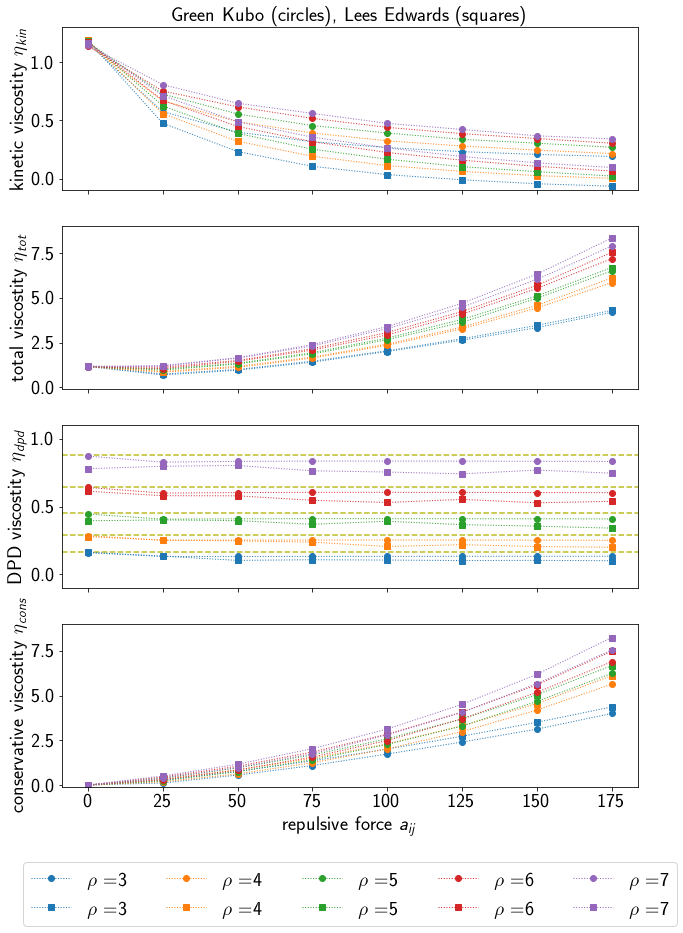

In [2]:
selection = [0, 40, 80]
selection = np.array(selection)

for i in range(40):
    data_gk[i,:] = [data[i,0], 
                     data[i,1], 
                     np.mean(data[selection,2]), 
                     np.std(data[selection,2]),
                     np.mean(data[selection,3]), 
                     np.std(data[selection,3]),
                     np.mean(data[selection,4]), 
                     np.std(data[selection,4])]
    selection += 1
    
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(3*3.375,4*3.375))

size = 20

selection = [0, 5, 10, 15, 20, 25, 30, 35]
rho = [3, 4, 5, 6, 7]
selection = np.array(selection)
c = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for i in range(5):
    axes[0].errorbar(data_gk[selection,1], data_gk[selection,2], yerr=data_gk[selection,3], 
                 marker='o',
                 color=c[i],
                 linestyle='dotted', 
                 linewidth=1.0, 
                 label = r"$\rho =$" + str(rho[i]))
    
    axes[1].errorbar(data_gk[selection,1], data_gk[selection,4], yerr=data_gk[selection,5], 
                 marker='o', 
                 color=c[i],
                 linestyle='dotted', 
                 linewidth=1.0, 
                 label = r"$\rho =$" + str(rho[i]))
    
    axes[2].errorbar(data_gk[selection,1], data_gk[selection,6], yerr=data_gk[selection,7], 
                 marker='o',
                 color=c[i],
                 linestyle='dotted', 
                 linewidth=1.0, 
                 label = r"$\rho =$" + str(rho[i]))
    axes[2].axhline(2*np.pi*4.5*rho[i]**2/1575, color='tab:olive', linestyle='dashed')
    
    axes[3].errorbar(data_gk[selection,1], data_gk[selection,4]-data_gk[selection,2], 
                 marker='o',
                 color=c[i],
                 linestyle='dotted', 
                 linewidth=1.0, 
                 label = r"$\rho =$" + str(rho[i]))
    
    
    #########################################################################################
    
    
    axes[0].errorbar(data_le[selection,1], data_le[selection,2], yerr=data_le[selection,3], 
                 marker='s',
                 color=c[i],
                 linestyle='dotted', 
                 linewidth=1.0, 
                 label = r"$\rho =$" + str(rho[i]))
    
    axes[1].errorbar(data_le[selection,1], data_le[selection,4], yerr=data_le[selection,5], 
                 marker='s',
                 color=c[i],
                 linestyle='dotted', 
                 linewidth=1.0, 
                 label = r"$\rho =$" + str(rho[i]))
    
    axes[2].errorbar(data_le[selection,1], data_le[selection,6], yerr=data_le[selection,7], 
                 marker='s',
                 color=c[i],
                 linestyle='dotted', 
                 linewidth=1.0, 
                 label = r"$\rho =$" + str(rho[i]))

    axes[3].errorbar(data_le[selection,1], data_le[selection,4]-data_le[selection,2], 
                 marker='s',
                 color=c[i],
                 linestyle='dotted', 
                 linewidth=1.0, 
                 label = r"$\rho =$" + str(rho[i]))

    selection += 1

    
axes[0].set_ylim(-0.1,1.3)
axes[0].set_ylim(-0.1,1.3)
    
axes[1].set_ylim(-0.1,9)
axes[1].set_ylim(-0.1,9)    
    
axes[2].set_ylim(-0.1,1.1)
axes[2].set_ylim(-0.1,1.1)

axes[3].set_ylim(-0.1,9)
axes[3].set_ylim(-0.1,9)  
    
axes[0].set_title("Green Kubo (circles), Lees Edwards (squares)", fontsize = size)

axes[0].set_ylabel("kinetic viscostity $\eta_{kin}$", fontsize = size)
axes[1].set_ylabel("total viscostity $\eta_{tot}$", fontsize = size)
axes[2].set_ylabel("DPD viscostity $\eta_{dpd}$", fontsize = size)
axes[3].set_ylabel("conservative viscostity $\eta_{cons}$", fontsize = size)

#axes[0,1].set_yticks([])
#axes[1,1].set_yticks([])
#axes[2,1].set_yticks([])
#axes[3,1].set_yticks([])
    
axes[3].set_xlabel("repulsive force $a_{ij}$", fontsize = size)
axes[3].set_xlabel("repulsive force $a_{ij}$", fontsize = size)

axes[3].legend(loc='upper center', bbox_to_anchor=(0.5, -0.4), ncol=5)

plt.tight_layout()
#plt.savefig("_superimposed_comp_gk_le.pdf")